In [2]:
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
import copy
from itertools import cycle, islice
from sklearn import cluster, datasets, mixture
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
plt.style.use('default')

# Begin here to import PCA and UMAP and Leiden Cluster Labels

In [3]:
pca_analysis = pd.read_csv('pca_results.csv', header = 0)
pca_analysis

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-5.556225,-0.257718,0.186786,-2.800096,0.050726,-0.010704,-0.560362,-3.071789,-2.945048,-1.946824,...,0.303822,-0.612891,0.786153,0.211624,2.257351,-2.356015,-0.341442,-0.339096,1.482910,1.897889
1,-7.209537,-7.481978,-0.162740,8.018522,-3.006617,-0.118053,-2.389257,-1.063644,0.655481,0.671241,...,0.676715,1.028544,-0.240437,2.396688,-1.040607,-2.215252,0.433334,-1.978341,-1.557420,-1.496098
2,-2.694430,1.583664,0.663126,-2.205646,1.789024,1.950146,2.070498,-1.606405,-0.911324,-1.386201,...,-0.900483,0.381840,0.508998,-1.640191,-0.271188,-2.021171,-1.815547,0.543203,-0.545106,-4.339565
3,10.143292,1.368525,-1.209819,0.700065,2.906171,0.036243,-1.272864,0.387448,-0.858374,0.004126,...,0.268223,0.930400,1.813390,-1.373973,1.640196,0.371741,0.094577,2.202551,1.797724,-0.176037
4,1.112835,8.152793,-1.332337,4.252488,-1.963194,-5.671656,-0.372425,0.136140,0.812770,-0.105267,...,1.280552,-1.423236,1.136208,1.226654,-0.449812,0.695716,2.179164,-0.441089,-4.958036,-0.704306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,9.601180,0.180180,-1.452582,0.237509,-5.028788,2.764379,-1.264232,3.897541,-0.976161,2.617133,...,3.105048,-0.072174,1.672519,-0.894084,0.917678,0.983014,-0.654412,2.679015,1.488883,0.120752
2634,-2.847886,-3.722200,0.217039,4.692725,0.254992,0.191907,-0.682628,-0.280466,2.262647,-5.913675,...,-0.989160,-2.677764,3.058086,-0.395191,-2.663330,1.620732,-0.324856,-2.521088,-2.440412,-3.539200
2635,-0.785408,-6.718586,-1.598860,4.170279,0.784721,-1.120681,-0.720857,1.615402,-0.169170,0.838488,...,-1.545383,-1.617926,-0.695416,-0.899763,0.566286,0.562708,-0.790847,-0.561099,-0.105485,0.583873
2636,0.281260,-5.921852,-1.162900,7.345957,0.484282,0.413800,-0.496882,-1.101007,1.018069,-0.100571,...,-1.825900,-2.570674,-0.177524,0.114567,2.184290,-0.260320,2.743233,-1.380870,3.580742,1.298842


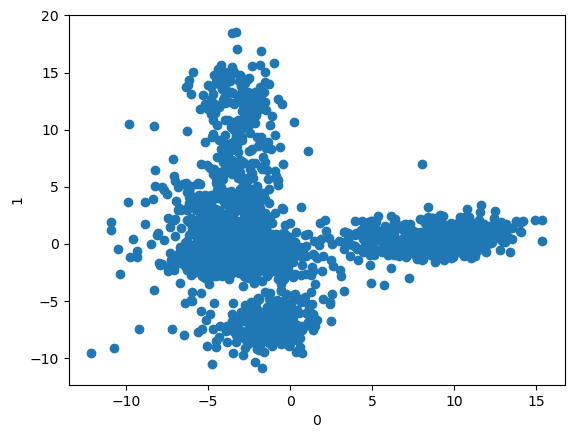

In [4]:
fig = plt.figure()
ax = fig.add_subplot()
pcx = '0'
pcy = '1'
ax.scatter(pca_analysis[pcx], pca_analysis[pcy])
ax.set_xlabel(pcx)
ax.set_ylabel(pcy)
plt.show()

In [5]:
n_pcs = 7
values_matrix = pca_analysis.values[:, 0:n_pcs]

In [6]:
values_matrix.shape

(2638, 7)

In [7]:
import numpy as np

# Assuming values_matrix is your data matrix

mean = np.mean(values_matrix, axis=0)
std_dev = np.std(values_matrix, axis=0)

# Calculate the bounds for 3 standard deviations
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Create 23 bins within the bounds and add 2 bins for the outliers
bins = np.empty((10, values_matrix.shape[1]))
for col in range(values_matrix.shape[1]):
    bins[1:-1, col] = np.linspace(lower_bound[col], upper_bound[col], num=8)
    bins[0, col] = -np.inf  # Bin for values below lower bound
    bins[-1, col] = np.inf  # Bin for values above upper bound

# Digitize the values
digitized = np.empty_like(values_matrix)
for col in range(values_matrix.shape[1]):
    digitized[:, col] = np.digitize(values_matrix[:, col], bins=bins[:, col])

# digitized now contains the indices of the bins to which each value belongs


In [8]:
print(np.shape(bins))
print(np.shape(digitized))

(10, 7)
(2638, 7)


In [9]:
#count the number of points in each bin combo. We have 25 bins for each x,y
dict25 = {}
for row in digitized:
    str_row = ' '.join(map(str, row.astype(int)))
    if  str_row not in dict25.keys():
        dict25[str_row] = 1
    else:
        dict25[str_row] = dict25[str_row] + 1

In [10]:
len(dict25)

1146

In [11]:
#convert to probabilities
total_counts = sum(dict25.values())
dict25_sp = {}
for k, v in dict25.items():
    dict25_sp[k] = v / total_counts

In [12]:
# We have to sort it from highest probability to lowest in the txt output

# Sort the dictionary by value in descending order
sorted_dict = dict(sorted(dict25_sp.items(), key=lambda x: x[1], reverse=True))

In [13]:
ph=np.loadtxt('scanpy_pcs.txt', dtype=float, usecols=(0,1), skiprows=2, delimiter='|')

print(len(ph))

455


In [14]:
ph.shape

(455, 2)

## Clustering Algorithm Results added here

In [15]:
# this is the clustering algorithm read in from the txt file vector data is the dimension space after clustering
microstates = pd.read_csv( "scanpy_pcs.txt.negmap" , sep="|" , skiprows= [1])
microstates.columns = [col.strip() for col in microstates.columns]
microstates["Vector"] = microstates["Vector"].apply(lambda v: np.array(v.strip().strip("[|]").split(), dtype= int))
microstates.head(15)

,Prob,State Index,Pk,Vector
0,0.027293,0,0,"[4, 5, 5, 4, 5, 5, 5]"
1,0.024640,1,0,"[4, 5, 5, 4, 5, 4, 5]"
2,0.019712,2,0,"[4, 5, 5, 4, 5, 5, 6]"
3,0.013268,3,0,"[4, 5, 5, 4, 5, 4, 4]"
4,0.012130,4,0,"[4, 5, 5, 4, 5, 4, 6]"
5,0.011372,5,0,"[4, 5, 5, 4, 5, 5, 4]"
6,0.010235,6,0,"[4, 5, 5, 4, 6, 5, 6]"
7,0.010235,7,0,"[5, 5, 5, 4, 5, 4, 5]"
8,0.009098,8,0,"[5, 5, 5, 4, 5, 5, 5]"
9,0.008719,9,9,"[5, 3, 5, 7, 5, 5, 5]"


In [16]:
microstates.shape

(1146, 4)

In [17]:
#find unique Pk
unique_pk_micro = microstates["Pk"].unique()
print(len(unique_pk_micro))

379


In [18]:
#find unique state index
unique_state_index_micro = microstates["State Index"].unique()
print(len(unique_state_index_micro))

1146


the pK are the unique values here that are repeated, persumable everytime a cluster is updated

done to ensure original files are not modified

In [19]:
# save the microstates to a csv file
microstates.to_csv('microstates.csv', index=False)

In [20]:
# load the microstates from the csv file
microstates_data = pd.read_csv('microstates.csv')

In [21]:
#find unique Pk
unique_pk = microstates_data["Pk"].unique()
print(len(unique_pk))

#length of Pk column
print(len(microstates_data["Pk"])) 

# these values are unique and repeated

379
1146


In [22]:
#find unique state index
unique_state_index = microstates_data["State Index"].unique()
print(len(unique_state_index))

#length of state index column
print(len(microstates_data["State Index"]))


1146
1146


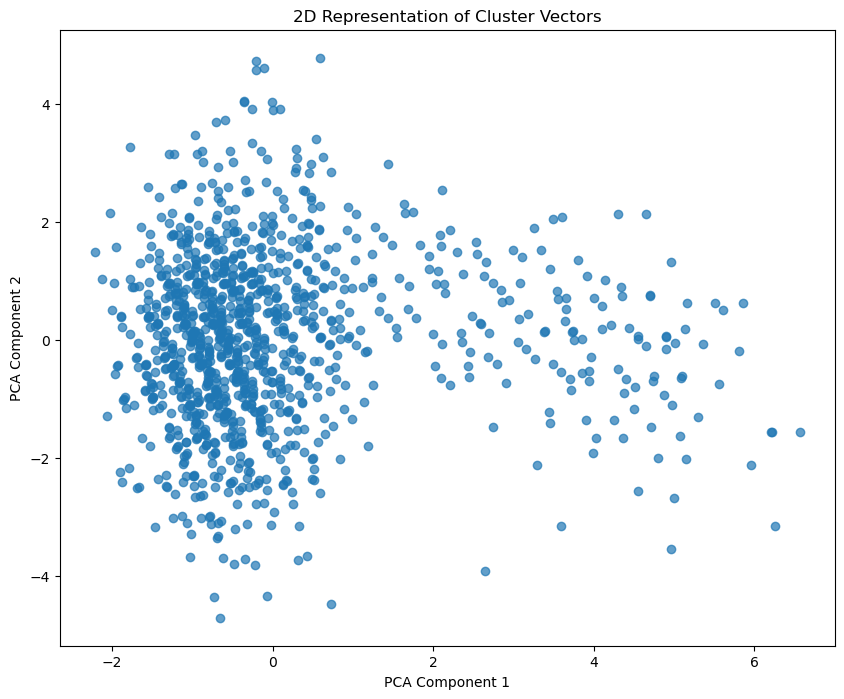

In [23]:
# trying to view the vectors in a 2D space

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import ast
import numpy as np

# Convert the 'Vector' column to a numerical format
microstates_data['Vector'] = microstates_data['Vector'].apply(lambda x: [int(num) for num in x.strip('[]').split()])

# Convert the list of vectors into a NumPy array for PCA
vector_data = np.array(microstates_data['Vector'].tolist())

# Re-applying PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vector_data)

# Re-plotting the reduced data
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7)
plt.title('2D Representation of Cluster Vectors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



In [24]:
microstates_data.head(10)

,Prob,State Index,Pk,Vector
0,0.027293,0,0,"[4, 5, 5, 4, 5, 5, 5]"
1,0.024640,1,0,"[4, 5, 5, 4, 5, 4, 5]"
2,0.019712,2,0,"[4, 5, 5, 4, 5, 5, 6]"
3,0.013268,3,0,"[4, 5, 5, 4, 5, 4, 4]"
4,0.012130,4,0,"[4, 5, 5, 4, 5, 4, 6]"
5,0.011372,5,0,"[4, 5, 5, 4, 5, 5, 4]"
6,0.010235,6,0,"[4, 5, 5, 4, 6, 5, 6]"
7,0.010235,7,0,"[5, 5, 5, 4, 5, 4, 5]"
8,0.009098,8,0,"[5, 5, 5, 4, 5, 5, 5]"
9,0.008719,9,9,"[5, 3, 5, 7, 5, 5, 5]"


In [25]:
# Finding the highest and lowest probabilities
highest_prob = microstates_data['Prob'].max()
lowest_prob = microstates_data['Prob'].min()

highest_prob, lowest_prob


(0.0272934040940106, 0.0003790750568613)

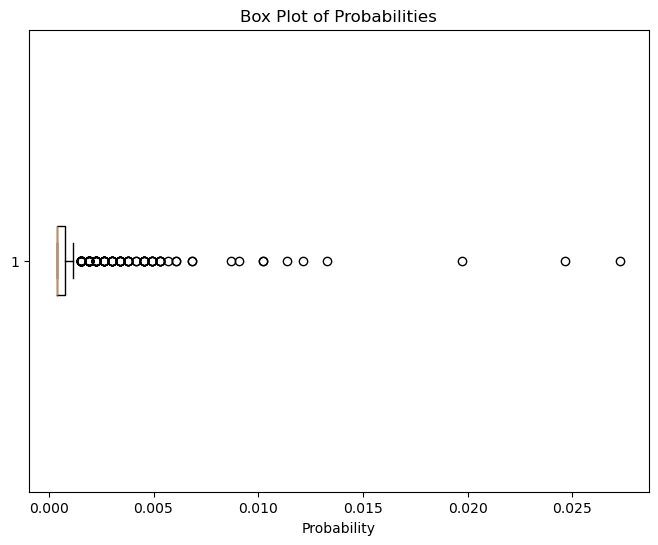

count    1146.000000
mean        0.000873
std         0.001666
min         0.000379
25%         0.000379
50%         0.000379
75%         0.000758
max         0.027293
Name: Prob, dtype: float64

In [26]:
# Describing the 'Prob' column
prob_description = microstates_data['Prob'].describe()

# Creating a box plot for the 'Prob' column
plt.figure(figsize=(8, 6))
plt.boxplot(microstates_data['Prob'], vert=False)
plt.title('Box Plot of Probabilities')
plt.xlabel('Probability')
plt.show()

prob_description


In [27]:
# Counting the number of times Pk 0 appears in the dataset
pk_0_count = microstates_data[microstates_data['Pk'] == 0].shape[0]
pk_0_count


297

In [28]:
# View the row with Pk 0 
microstates_data[microstates_data['Pk'] == 0]

,Prob,State Index,Pk,Vector
0,0.027293,0,0,"[4, 5, 5, 4, 5, 5, 5]"
1,0.024640,1,0,"[4, 5, 5, 4, 5, 4, 5]"
2,0.019712,2,0,"[4, 5, 5, 4, 5, 5, 6]"
3,0.013268,3,0,"[4, 5, 5, 4, 5, 4, 4]"
4,0.012130,4,0,"[4, 5, 5, 4, 5, 4, 6]"
...,...,...,...,...
1101,0.000379,1101,0,"[7, 5, 4, 5, 7, 5, 5]"
1109,0.000379,1109,0,"[4, 6, 5, 5, 6, 5, 6]"
1120,0.000379,1120,0,"[4, 4, 6, 4, 5, 4, 4]"
1124,0.000379,1124,0,"[5, 4, 5, 4, 5, 5, 3]"


it seems like everytime the cluster is updated new cells are added updated the state index 

In [29]:
# Counting the number of times Pk 1 appears in the dataset
pk_9_count = microstates_data[microstates_data['Pk'] == 9].shape[0]
pk_9_count

114

In [30]:
# View the row with Pk 9
microstates_data[microstates_data['Pk'] == 9]

,Prob,State Index,Pk,Vector
9,0.008719,9,9,"[5, 3, 5, 7, 5, 5, 5]"
17,0.005307,17,9,"[5, 3, 5, 7, 5, 5, 6]"
19,0.005307,19,9,"[5, 3, 5, 7, 5, 5, 4]"
54,0.002654,54,9,"[5, 3, 5, 7, 5, 4, 5]"
55,0.002654,55,9,"[5, 3, 5, 7, 5, 4, 4]"
...,...,...,...,...
1081,0.000379,1081,9,"[5, 3, 5, 8, 4, 4, 5]"
1090,0.000379,1090,9,"[4, 3, 4, 7, 5, 6, 5]"
1092,0.000379,1092,9,"[5, 4, 5, 7, 5, 4, 4]"
1115,0.000379,1115,9,"[4, 4, 5, 7, 6, 6, 6]"


the state index also updates to I think same as the Pk

In [31]:
#based on this keeping the pk with highest probability
#making a new df to store the aggregated data
aggregated_data = microstates_data.groupby('Pk').apply(lambda x: x.loc[x['Prob'].idxmax()]).reset_index(drop=True)

# Displaying the first few rows of the new aggregated DataFrame with max probability
aggregated_data.head()

,Prob,State Index,Pk,Vector
0,0.027293,0,0,"[4, 5, 5, 4, 5, 5, 5]"
1,0.008719,9,9,"[5, 3, 5, 7, 5, 5, 5]"
2,0.004928,21,15,"[7, 5, 5, 5, 5, 5, 5]"
3,0.001895,91,20,"[5, 4, 5, 4, 5, 3, 4]"
4,0.001895,89,21,"[7, 5, 5, 5, 6, 5, 5]"


In [32]:
# aggregated_data shape
aggregated_data.shape

(379, 4)

same shape as the unique vales

In [33]:
# find the unique Pk in the aggregated data
unique_pk_agg = aggregated_data["Pk"].unique()
print(len(unique_pk_agg))

# find the unique state index in the aggregated data
unique_state_index_agg = aggregated_data["State Index"].unique()
print(len(unique_state_index_agg))


379
379


### Scanpy_pcs

this is the another file not sure what it is but it probably has the clusters birth and death info again 

In [34]:
#this is the proabalistic map, the 0.000379075 means 1/2638
peaks = pd.read_csv("scanpy_pcs.txt" , sep="|" , skiprows= [1])
peaks.columns = [col.strip() for col in peaks.columns]
peaks.head()

,Birth Probability,Death Probability,Birth State Index,Death State Index
0,0.027293,-1.0,0,-1
1,0.008719,-1.0,9,-1
2,0.001137,-1.0,207,-1
3,0.000758,-1.0,371,-1
4,0.000758,-1.0,268,-1


In [35]:
# find unique birth state index
unique_birth = peaks["Birth State Index"].unique()
print(len(unique_birth))


455


In [36]:
# fins unique death state index
unique_death = peaks["Death State Index"].unique()
print(len(unique_death))

124


I do this so I will not modify the original files

In [37]:
# save the peaks to a csv file
peaks.to_csv('peaks.csv', index=False)


In [38]:
#load the peaks from the csv file
peaks_data = pd.read_csv('peaks.csv')

new column final state to see if birth death states change

In [39]:
# Creating the 'Final State' column, initially the same as 'Birth State Index'
peaks_data['Final State Index'] = peaks_data['Birth State Index']

# Updating 'Final State' where 'Death State Index' is different and not -1
peaks_data.loc[(peaks_data['Death State Index'] != -1) & 
               (peaks_data['Death State Index'] != peaks_data['Birth State Index']), 
               'Final State Index'] = peaks_data['Death State Index']

# Drop the rows where 'Final State Index' is -1
peaks_data = peaks_data[peaks_data['Final State Index'] != -1].reset_index(drop=True)

# Displaying the first few rows to verify the changes
peaks_data.head()


,Birth Probability,Death Probability,Birth State Index,Death State Index,Final State Index
0,0.027293,-1.0,0,-1,0
1,0.008719,-1.0,9,-1,9
2,0.001137,-1.0,207,-1,207
3,0.000758,-1.0,371,-1,371
4,0.000758,-1.0,268,-1,268


In [40]:
# find unique Final state index
unique_final = peaks_data["Final State Index"].unique()
print(len(unique_final))

432


In [41]:
# find unique birth state index
unique_birth = peaks_data["Birth State Index"].unique()
print(len(unique_birth))

455


In [42]:
# print the values that are present in unique_final but not in unique_pk
print(len(np.setdiff1d(unique_birth, unique_pk)))
print(np.setdiff1d(unique_birth, unique_pk))

#123 values missing not sure why this is happening

76
[  74   79  104  114  121  137  151  182  187  206  222  238  240  256
  316  335  336  338  348  349  359  369  385  390  398  424  429  435
  436  438  442  446  447  448  462  477  482  491  494  499  510  516
  521  528  572  576  604  614  620  629  648  652  657  660  663  674
  680  682  689  710  725  737  742  745  779  785  801  822  855  915
  926  955  975  981 1016 1020]


In [43]:
# save missing values to a list
missing_values = np.setdiff1d(unique_birth, unique_pk)
len(missing_values)

76

In [44]:
# rows where 'Final State Index' is 28
peaks_data[peaks_data['Final State Index'] == 28]

,Birth Probability,Death Probability,Birth State Index,Death State Index,Final State Index
327,0.004928,0.004549,20,28,28


In [45]:
# match missing_values with values in State Index in microstates_data
missing_values_match = microstates_data[microstates_data['State Index'].isin(missing_values)]
missing_values_match.head(50)

,Prob,State Index,Pk,Vector
74,0.002274,74,0,"[4, 5, 5, 4, 6, 4, 5]"
79,0.002274,79,0,"[5, 4, 5, 4, 5, 4, 5]"
104,0.001516,104,9,"[4, 3, 5, 7, 5, 5, 7]"
114,0.001516,114,15,"[7, 5, 5, 4, 5, 5, 4]"
121,0.001516,121,0,"[4, 5, 5, 4, 5, 6, 3]"
137,0.001516,137,0,"[5, 4, 5, 4, 6, 4, 5]"
151,0.001137,151,15,"[7, 5, 4, 5, 6, 4, 5]"
182,0.001137,182,15,"[7, 5, 4, 4, 6, 5, 4]"
187,0.001137,187,15,"[6, 5, 5, 5, 7, 5, 4]"
206,0.001137,206,0,"[5, 5, 5, 4, 6, 4, 5]"


In [46]:
# rows in aggregated_data where 'State Index' is 28
aggregated_data[aggregated_data['State Index'] == 28]

,Prob,State Index,Pk,Vector


This means that the files have each event info - but we are interested in just the final values , so I am going to merge on that 

In [47]:
# Merging 'microstates.csv' and 'peaks.csv' on 'State Index' and 'Birth State Index'
merged_data = pd.merge(aggregated_data, peaks_data, left_on='Pk', right_on='Final State Index', how='left')

# Displaying the first few rows of the merged DataFrame
print(merged_data.shape)
merged_data.head()

(379, 9)


,Prob,State Index,Pk,Vector,Birth Probability,Death Probability,Birth State Index,Death State Index,Final State Index
0,0.027293,0,0,"[4, 5, 5, 4, 5, 5, 5]",0.027293,-1.0,0.0,-1.0,0.0
1,0.008719,9,9,"[5, 3, 5, 7, 5, 5, 5]",0.008719,-1.0,9.0,-1.0,9.0
2,0.004928,21,15,"[7, 5, 5, 5, 5, 5, 5]",NaN,NaN,NaN,NaN,NaN
3,0.001895,91,20,"[5, 4, 5, 4, 5, 3, 4]",NaN,NaN,NaN,NaN,NaN
4,0.001895,89,21,"[7, 5, 5, 5, 6, 5, 5]",NaN,NaN,NaN,NaN,NaN


In [48]:
# Fill NaN values in 'Birth Probability' with the value from 'Prob'
merged_data['Birth Probability'] = merged_data['Birth Probability'].fillna(merged_data['Prob'])

# Fill NaN values in 'Death Probability' and 'Death State Index' with -1
merged_data['Death Probability'] = merged_data['Death Probability'].fillna(-1)
merged_data['Death State Index'] = merged_data['Death State Index'].fillna(-1)

# Fill NaN values in 'Birth State Index' and 'Final State Index' with the value from 'Pk'
merged_data['Birth State Index'] = merged_data['Birth State Index'].fillna(merged_data['Pk'])
merged_data['Final State Index'] = merged_data['Final State Index'].fillna(merged_data['Pk'])

# Display the first few rows of the modified merged DataFrame
merged_data.head()


,Prob,State Index,Pk,Vector,Birth Probability,Death Probability,Birth State Index,Death State Index,Final State Index
0,0.027293,0,0,"[4, 5, 5, 4, 5, 5, 5]",0.027293,-1.0,0.0,-1.0,0.0
1,0.008719,9,9,"[5, 3, 5, 7, 5, 5, 5]",0.008719,-1.0,9.0,-1.0,9.0
2,0.004928,21,15,"[7, 5, 5, 5, 5, 5, 5]",0.004928,-1.0,15.0,-1.0,15.0
3,0.001895,91,20,"[5, 4, 5, 4, 5, 3, 4]",0.001895,-1.0,20.0,-1.0,20.0
4,0.001895,89,21,"[7, 5, 5, 5, 6, 5, 5]",0.001895,-1.0,21.0,-1.0,21.0


In [49]:
# Are Prob and Birth Probability the same for each row?
merged_data['Prob'].equals(merged_data['Birth Probability'])


True

In [50]:
# Are state index and Final State Index the same for each row?
merged_data['State Index'].equals(merged_data['Final State Index'])


False

In [51]:
# unique values Pk in merged data
unique_pk_merged = merged_data["Pk"].unique()
print(len(unique_pk_merged))

379


I did a couple pf merges and this is the only one that Birth Probability and the Prob in both columns match 

In [52]:
# save the merged data to a csv file
merged_data.to_csv('merged_data.csv', index=False)

# load the merged data from the csv file
final_data = pd.read_csv('merged_data.csv')
final_data.head()

,Prob,State Index,Pk,Vector,Birth Probability,Death Probability,Birth State Index,Death State Index,Final State Index
0,0.027293,0,0,"[4, 5, 5, 4, 5, 5, 5]",0.027293,-1.0,0.0,-1.0,0.0
1,0.008719,9,9,"[5, 3, 5, 7, 5, 5, 5]",0.008719,-1.0,9.0,-1.0,9.0
2,0.004928,21,15,"[7, 5, 5, 5, 5, 5, 5]",0.004928,-1.0,15.0,-1.0,15.0
3,0.001895,91,20,"[5, 4, 5, 4, 5, 3, 4]",0.001895,-1.0,20.0,-1.0,20.0
4,0.001895,89,21,"[7, 5, 5, 5, 6, 5, 5]",0.001895,-1.0,21.0,-1.0,21.0


Since the 'Vector' column represents the dimensions made during clustering, we could consider each element of these vectors as features.
we can then compute the Pearson correlation matrix. This matrix will show the correlation between each pair of features across all clusters.

In [53]:
import ast

# Convert the 'Vector' column into actual lists
final_data['Vector'] = final_data['Vector'].apply(ast.literal_eval)

# Convert the 'Vector' lists into separate columns
vector_df = pd.DataFrame(final_data['Vector'].tolist())

# Incorporate the 'Prob' column if it's needed for the analysis
# For now, we'll focus on the vector data
# Combine the 'Pk' column with the vector dataframe
combined_df = pd.concat([final_data[['Pk', 'Prob']], vector_df], axis=1)

# To ensure Pk values are treated as unique identifiers (like strings), we'll convert them to string type
#combined_df['Pk'] = combined_df['Pk'].astype(str)

# Check the number of unique Pk values to ensure there are 309
num_unique_pks = combined_df['Pk'].nunique()
print(num_unique_pks)

# For each Pk, compute the mean of the vector dimensions
pk_means = combined_df.groupby('Pk').mean()

# We need a correlation matrix where each Pk value correlates with every other Pk value
# To achieve this, we use the transpose of the pk_means dataframe to compute the correlation
# This will treat each Pk as a separate entity and compute correlations between their mean vector values
pk_correlation_matrix_final = pk_means.T.corr()


379


In [54]:
pk_correlation_matrix_final

Pk,0,9,15,20,21,43,48,49,58,80,...,1131,1132,1134,1137,1139,1141,1142,1143,1144,1145
Pk,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.744558,0.843816,0.854444,0.855653,0.890752,0.816903,0.709258,0.783652,0.815170,...,0.816967,0.721272,0.721272,0.912692,0.760251,0.754949,0.726182,0.595269,0.644865,0.812976
9,0.744558,1.000000,0.800880,0.776413,0.799607,0.667313,0.728871,0.522109,0.756192,0.773656,...,0.728927,0.968116,0.708525,0.899863,0.968116,0.647993,0.924280,0.788016,0.633469,0.965859
15,0.843816,0.800880,1.000000,0.911362,0.985129,0.706983,0.834335,0.600553,0.925629,0.965931,...,0.834389,0.775691,0.910001,0.855433,0.708537,0.932858,0.628599,0.676755,0.813602,0.757676
20,0.854444,0.776413,0.911362,1.000000,0.938067,0.588794,0.893114,0.658654,0.783116,0.921800,...,0.855126,0.671740,0.792122,0.925156,0.751995,0.812975,0.653628,0.586062,0.564705,0.761237
21,0.855653,0.799607,0.985129,0.938067,1.000000,0.695047,0.911537,0.587084,0.858219,0.985277,...,0.911575,0.741836,0.839704,0.879303,0.741836,0.898294,0.664297,0.590294,0.721585,0.758399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,0.754949,0.647993,0.932858,0.812975,0.898294,0.571481,0.664275,0.600056,0.839793,0.833666,...,0.726148,0.627722,0.953866,0.688611,0.529878,1.000000,0.504874,0.661476,0.736183,0.601503
1142,0.726182,0.924280,0.628599,0.653628,0.664297,0.653957,0.678228,0.485566,0.520828,0.607290,...,0.726728,0.869216,0.511266,0.830555,0.971487,0.504874,1.000000,0.646817,0.388528,0.929498
1143,0.595269,0.788016,0.676755,0.586062,0.590294,0.538028,0.356467,0.723039,0.793950,0.540628,...,0.382506,0.817706,0.817706,0.689131,0.680836,0.661476,0.646817,1.000000,0.682136,0.815871


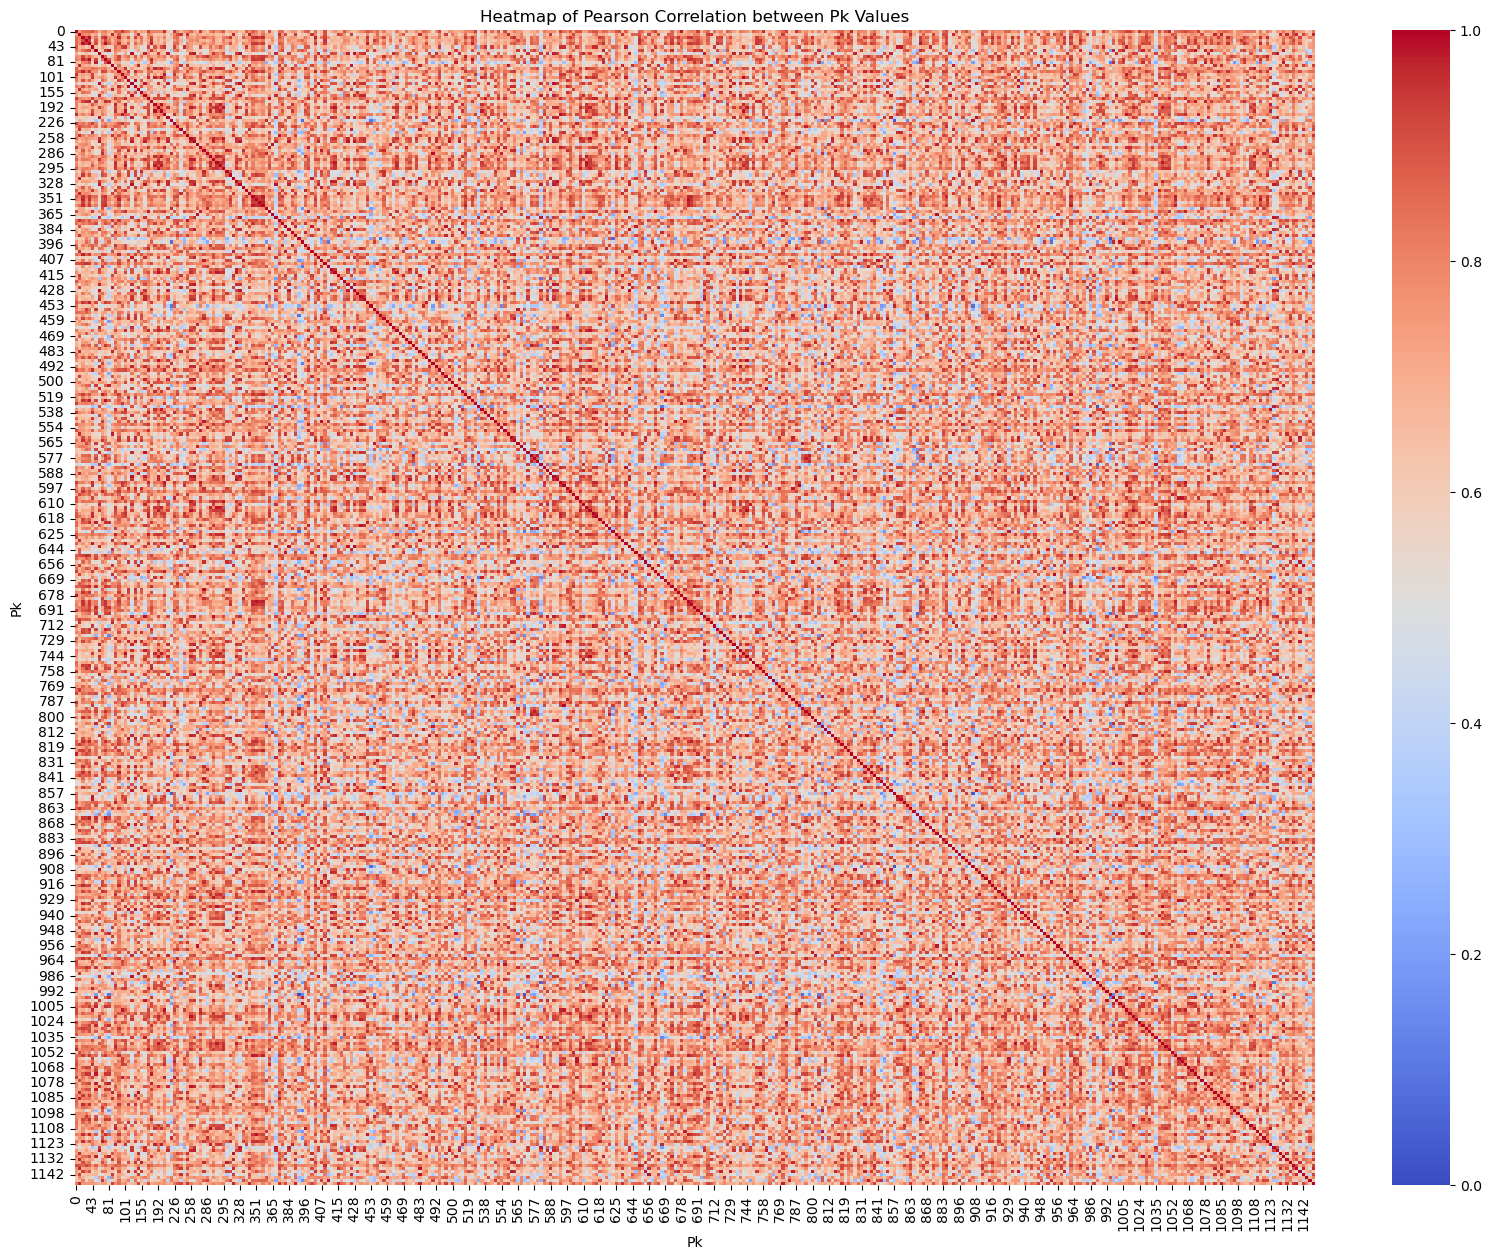

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the heatmap
plt.figure(figsize=(20, 15))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(pk_correlation_matrix_final, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Heatmap of Pearson Correlation between Pk Values')

# Show the heatmap
plt.show()


Let us try this for blocks that are less than 5/2638

In [56]:
# Calculate the threshold probability value
threshold_prob = 5 / 2638

# Filter out the rows where the probability is less than the threshold
filtered_df = combined_df[combined_df['Prob'] < threshold_prob]

# For the filtered Pk values, create a new dataframe for correlation calculation
# We'll use the mean of the vector dimensions for each Pk, as we did before
filtered_pk_means = filtered_df.groupby('Pk').mean()

# Compute the Pearson correlation matrix for this filtered set of Pk values
filtered_pk_correlation_matrix = filtered_pk_means.T.corr()

# Display the shape of the new correlation matrix to confirm its size
print(filtered_pk_correlation_matrix.shape)

filtered_pk_correlation_matrix.head()  # Displaying part of the matrix for a glimpse


(372, 372)


Pk,49,58,80,81,82,84,95,100,101,113,...,1131,1132,1134,1137,1139,1141,1142,1143,1144,1145
Pk,,,,,,,,,,,,,,,,,,,,,
49,1.000000,0.621817,0.554531,0.447819,0.534321,0.762420,0.594695,0.512055,0.723482,0.488143,...,0.558749,0.456179,0.630042,0.705823,0.530692,0.600056,0.485566,0.723039,0.385648,0.673737
58,0.621817,1.000000,0.857405,0.559975,0.666652,0.798932,0.921516,0.723521,0.782324,0.849669,...,0.614052,0.803454,0.910020,0.790260,0.625844,0.839793,0.520828,0.793950,0.940655,0.745219
80,0.554531,0.857405,1.000000,0.898531,0.667651,0.820719,0.905546,0.676380,0.713822,0.775288,...,0.898150,0.716909,0.781739,0.868504,0.716909,0.833666,0.607290,0.540628,0.727909,0.731966
81,0.447819,0.559975,0.898531,1.000000,0.580396,0.706450,0.722906,0.533511,0.582119,0.557633,...,0.974426,0.527046,0.501172,0.768996,0.682289,0.652075,0.611327,0.256660,0.401816,0.618935
82,0.534321,0.666652,0.667651,0.580396,1.000000,0.569059,0.831565,0.588917,0.598849,0.626114,...,0.680580,0.933804,0.675146,0.802716,0.933804,0.627119,0.936574,0.814700,0.552235,0.937099


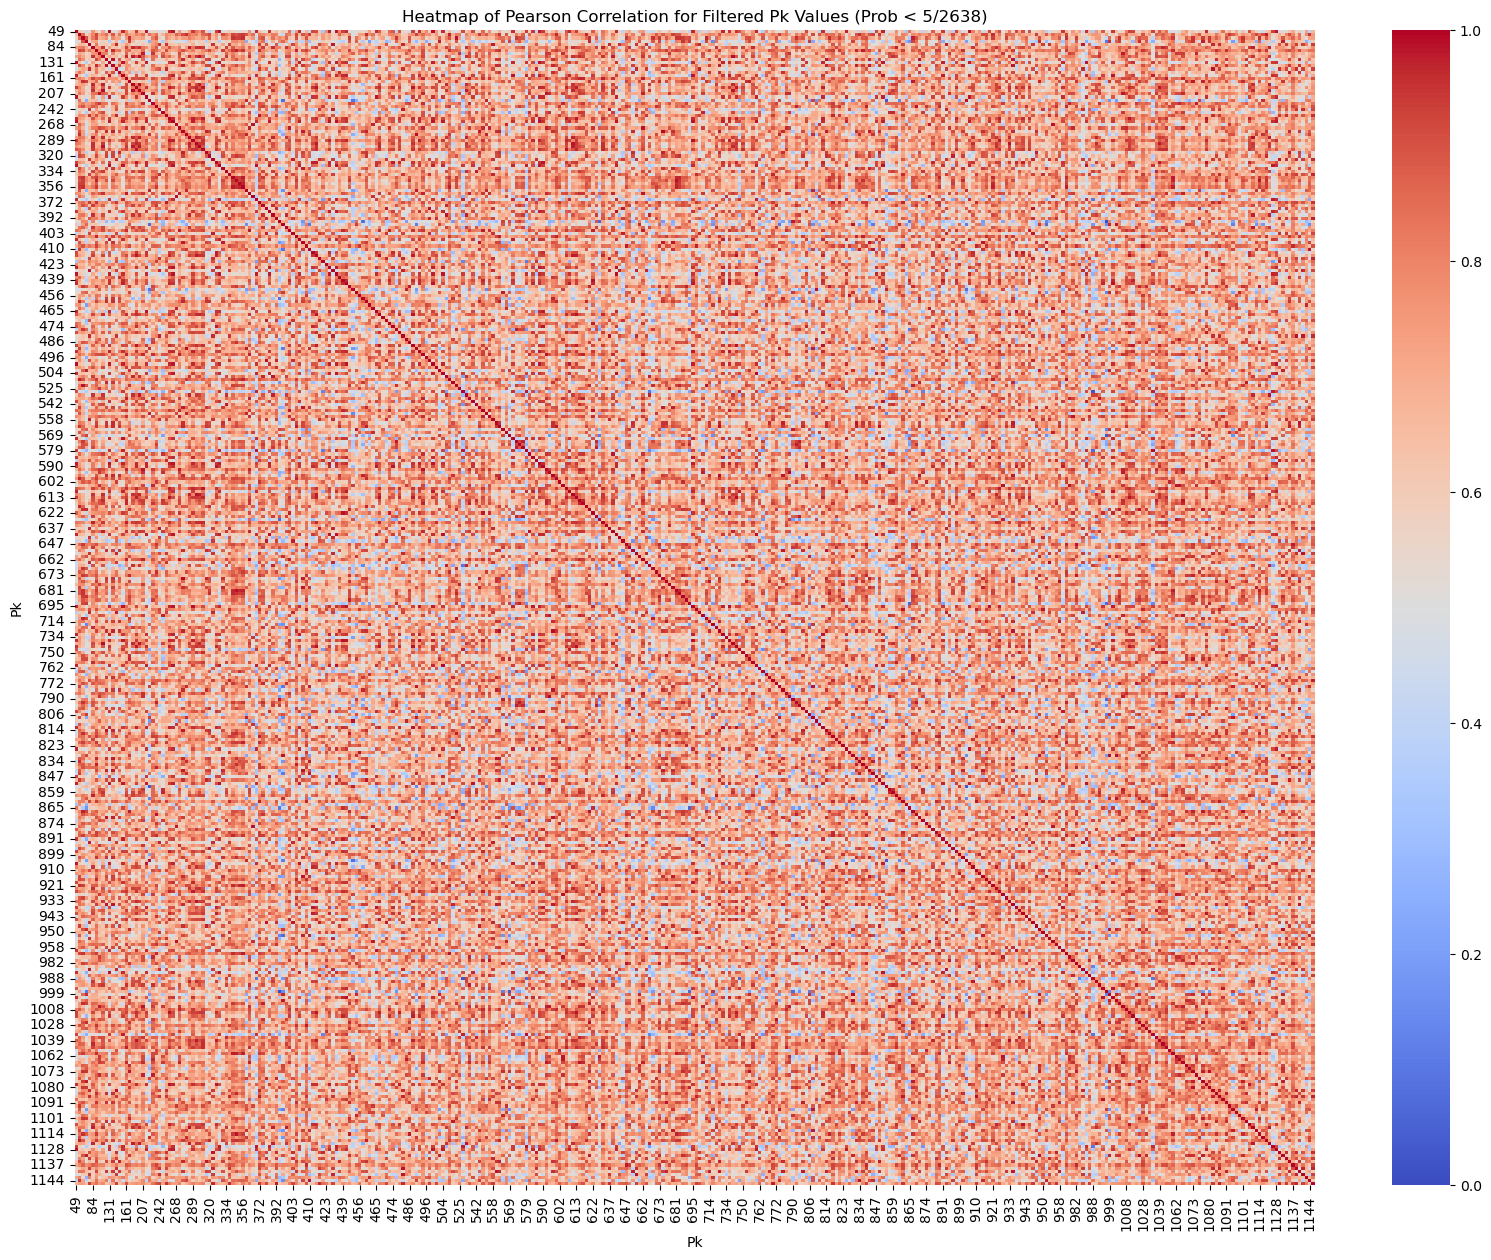

In [57]:
# Create a heatmap for the filtered correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(filtered_pk_correlation_matrix, cmap='coolwarm')
plt.title('Heatmap of Pearson Correlation for Filtered Pk Values (Prob < 5/2638)')
plt.show()


In [58]:
# save the correlation matrix to a csv file
filtered_pk_correlation_matrix.to_csv('filtered_pk_correlation_matrix.csv')


In [59]:
# Calculate the threshold probability value
threshold_prob = 5 / 2638

# Filter out the rows where the probability is less than the threshold
low_prob_pks = final_data[final_data['Prob'] < threshold_prob]

# To ensure Pk values are treated as unique identifiers (like strings), we'll convert them to string type
#low_prob_pks['Pk'] = low_prob_pks['Pk'].astype(str)

# Display the first few rows of low probability Pks for a glimpse
low_prob_pks.head()

,Prob,State Index,Pk,Vector,Birth Probability,Death Probability,Birth State Index,Death State Index,Final State Index
7,0.001516,131,49,"[4, 9, 5, 7, 5, 3, 6]",0.001516,-1.0,49.0,-1.0,49.0
8,0.001137,197,58,"[6, 5, 5, 5, 3, 5, 4]",0.001137,-1.0,58.0,-1.0,58.0
9,0.001516,111,80,"[7, 5, 5, 5, 6, 5, 4]",0.001516,-1.0,80.0,-1.0,80.0
10,0.000758,330,81,"[7, 5, 4, 5, 9, 5, 4]",0.000758,-1.0,81.0,-1.0,81.0
11,0.001516,132,82,"[5, 3, 4, 8, 5, 5, 6]",0.001516,-1.0,82.0,-1.0,82.0


In [60]:
from scipy.spatial.distance import cdist

# Convert the vector lists into a DataFrame for distance calculations
vector_df = pd.DataFrame(low_prob_pks['Vector'].tolist(), index=low_prob_pks['Pk'])

# Compute the Manhattan (cityblock) distances between all pairs of low-probability Pks
manhattan_distances = cdist(vector_df, vector_df, metric='cityblock')

# Convert the distance matrix to a DataFrame for easier manipulation
distance_df = pd.DataFrame(manhattan_distances, index=vector_df.index, columns=vector_df.index)

# Display the first few rows of the distance matrix for a glimpse
print(distance_df.shape)
distance_df.head()

(372, 372)


Pk,49,58,80,81,82,84,95,100,101,113,...,1131,1132,1134,1137,1139,1141,1142,1143,1144,1145
Pk,,,,,,,,,,,,,,,,,,,,,
49,0.0,14.0,14.0,18.0,11.0,10.0,11.0,12.0,9.0,15.0,...,15.0,12.0,12.0,10.0,10.0,13.0,13.0,10.0,18.0,8.0
58,14.0,0.0,4.0,8.0,11.0,6.0,7.0,10.0,9.0,7.0,...,7.0,8.0,4.0,6.0,10.0,7.0,15.0,8.0,4.0,8.0
80,14.0,4.0,0.0,4.0,11.0,6.0,5.0,10.0,9.0,7.0,...,5.0,10.0,6.0,6.0,8.0,7.0,13.0,12.0,6.0,8.0
81,18.0,8.0,4.0,0.0,13.0,10.0,9.0,14.0,13.0,11.0,...,3.0,14.0,10.0,10.0,12.0,9.0,15.0,16.0,10.0,12.0
82,11.0,11.0,11.0,13.0,0.0,11.0,8.0,11.0,12.0,12.0,...,10.0,5.0,11.0,9.0,5.0,10.0,6.0,7.0,15.0,5.0


In [61]:
# save the distance matrix to a csv file
distance_df.to_csv('distance_matrix.csv')

In [62]:
# see if the distance_df and filtered_pk_correlation_matrix have the same column names
print(distance_df.columns.equals(filtered_pk_correlation_matrix.columns))

True


In [63]:
# Ensuring that Pk values are consistent and exist in all dataframes

# Check if all Pks in combined_df are in the distance and correlation matrices
pks_in_combined_df = set(combined_df['Pk'])
pks_in_distance_matrix = set(distance_df.index)
pks_in_correlation_matrix = set(filtered_pk_correlation_matrix.index)

# Find Pks that are not common in all dataframes
non_common_pks = (pks_in_combined_df - pks_in_distance_matrix) | (pks_in_combined_df - pks_in_correlation_matrix)

# Display any non-common Pks
non_common_pks # the only excluded blocks


{0, 9, 15, 20, 21, 43, 48}

In [64]:
# Filter the combined_df to include only the Pk values that are present in both the distance and correlation matrices
common_pks = pks_in_distance_matrix.intersection(pks_in_correlation_matrix)
filtered_combined_df = combined_df[combined_df['Pk'].isin(common_pks)]


In [65]:
# Implementing the merging process

# Function to find the closest Pk for merging
def find_closest_pk(pk, distance_df, correlation_df):
    # Get distances and correlations for the given Pk
    distances = distance_df.loc[pk]
    correlations = correlation_df.loc[pk]

    # Ignore the distance to itself by setting it to infinity
    distances[pk] = float('inf')

    # Find the minimum distance
    min_distance = distances.min()
    closest_pks = distances[distances == min_distance].index

    # If more than one Pk is at the same minimum distance, choose the one with the highest correlation
    if len(closest_pks) > 1:
        closest_pk = correlations[closest_pks].idxmax()
    else:
        closest_pk = closest_pks[0]

    return closest_pk

# Merging function  for each cluster

def merge_clusters(data, distance_df, correlation_df, threshold_prob):
    merges = []
    pks_to_merge = set(data[data['Prob'] < threshold_prob]['Pk'])

    while pks_to_merge:
        # Select a random Pk to start merging
        current_pk = pks_to_merge.pop()
        merge_count = 0
        last_pk = None

        # Continue merging until the probability threshold is met or no more Pks to merge
        while data.loc[data['Pk'] == current_pk, 'Prob'].iloc[0] < threshold_prob and pks_to_merge:
            closest_pk = find_closest_pk(current_pk, distance_df, correlation_df)

            # Merge current Pk with the closest Pk
            current_prob = data.loc[data['Pk'] == current_pk, 'Prob'].iloc[0]
            closest_pk_prob = data.loc[data['Pk'] == closest_pk, 'Prob'].iloc[0]
            new_prob = current_prob + closest_pk_prob

            # Update merge count and last merged Pk
            merge_count += 1
            last_pk = closest_pk

            # Update the dataframe with new probability
            data.loc[data['Pk'] == current_pk, 'Prob'] = new_prob
            data.loc[data['Pk'] == closest_pk, 'Prob'] = new_prob

            # Remove the merged Pk from the set
            pks_to_merge.discard(closest_pk)

            # Update the current Pk if the closest Pk has a higher initial probability
            if closest_pk_prob > current_prob:
                current_pk = closest_pk

        # Record the merge details
        merges.append({
            'Birth Prob': current_prob,
            'State Index': current_pk,
            'Final Index': last_pk,
            'Pk': current_pk,
            'Prob': new_prob,
            'Merge Count': merge_count,
            'Last Pk': last_pk
        })

    return pd.DataFrame(merges)

In [66]:
# threshold for the merge
threshold = 5/2638
# Perform the merging process
merged_data_full = merge_clusters(combined_df, distance_df, filtered_pk_correlation_matrix, threshold)

# Display the first few rows of the merge records
print(merged_data_full.shape)
merged_data_full.head(15)

(256, 7)


,Birth Prob,State Index,Final Index,Pk,Prob,Merge Count,Last Pk
0,0.001516,49,131.0,49,0.002274,1,131.0
1,0.001516,58,512.0,58,0.003033,2,512.0
2,0.001516,80,523.0,80,0.001895,1,523.0
3,0.001137,81,1131.0,81,0.002274,2,1131.0
4,0.001516,82,558.0,82,0.001895,1,558.0
5,0.001137,84,625.0,84,0.002274,2,625.0
6,0.001137,95,835.0,95,0.002274,2,835.0
7,0.001516,100,1074.0,100,0.003033,3,1074.0
8,0.001137,101,195.0,101,0.001895,1,195.0
9,0.001137,134,113.0,134,0.002274,2,113.0


In [67]:
#find the maximum and lowest probability in merged data
max_prob = merged_data_full['Prob'].max()
min_prob = merged_data_full['Prob'].min()

max_prob, min_prob

(0.0053070507960577, 0.0018953752843063)

In [68]:
# value counts of the merge count
merged_data_full['Merge Count'].value_counts()

Merge Count
1    142
3     85
2     28
0      1
Name: count, dtype: int64